In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# 调色板

In [2]:
def mulit_colors(num_classes: int):
    #---------------------------------------------------#
    #   https://github.com/bubbliiiing/yolov8-pytorch/blob/master/yolo.py#L88
    #   画框设置不同的颜色
    #---------------------------------------------------#
    #             (hue, saturation, value)
    hsv_tuples = [(x / num_classes, 0.6, 1.) for x in range(num_classes)]
    # colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = [colorsys.hsv_to_rgb(*x) for x in hsv_tuples]
    # colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    colors = [(int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)) for x in colors]
    return colors

# 载入模型

In [3]:
# model_type: ['default', 'vit_h', 'vit_l', 'vit_b']
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth").to("cuda:0")
sam.device

device(type='cuda', index=0)

# generate masks for an entire image

In [4]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [9]:
image = cv2.imread(r"wallpapers/0505 senna gtr.jpg")
image.shape

(1280, 1920, 3)

In [10]:
# image: [H, W, C]
masks = mask_generator.generate(image)

In [11]:
len(masks)

49

In [12]:
masks[0]["segmentation"]

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [13]:
colors = mulit_colors(len(masks))
colors[0]

(255, 102, 102)

In [14]:
segmentations = np.zeros(image.shape, dtype=np.uint8)

In [15]:
for i in range(len(masks)):
    segmentations[masks[i]["segmentation"]] = colors[i]

In [16]:
segmentations[0]

array([[255, 195, 102],
       [255, 195, 102],
       [255, 195, 102],
       ...,
       [255, 195, 102],
       [255, 195, 102],
       [255, 195, 102]], dtype=uint8)

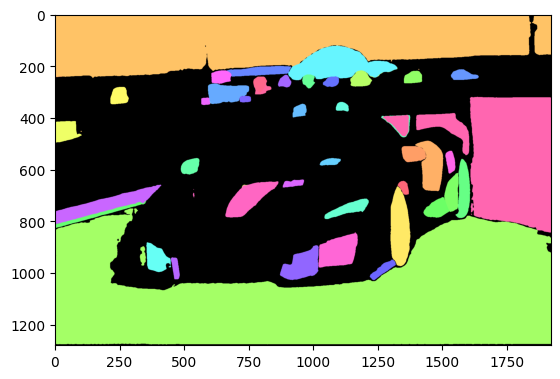

In [17]:
plt.imshow(segmentations)

In [18]:
mix = cv2.addWeighted(image[:, :, ::-1], 0.7, segmentations, 0.3, 1)

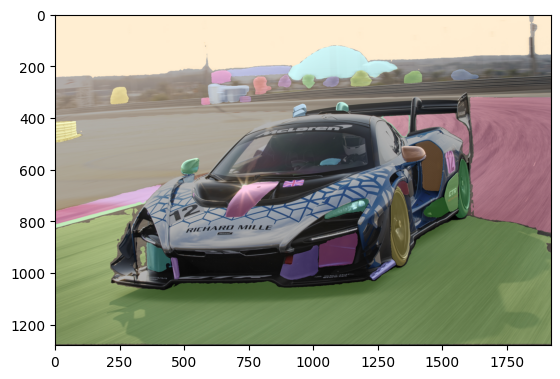

In [19]:
plt.imshow(mix)

# get masks from a given prompt

In [152]:
predictor = SamPredictor(sam)

In [ ]:
predictor.set_image(image)

In [ ]:
masks, _, _ = predictor.predict(<input_prompts>)